<a href="https://colab.research.google.com/github/tinapiao/Fruit-Image-Classification/blob/main/Baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import math
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

Using TensorFlow backend.


Files imported successfully


In [ ]:
classes = ('Apricot','Avocado' )
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR100 training data
    
file_list=os.listdir('/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline')
print(file_list)
os.chdir('/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline')


for i in range(len(classes)):
    print(classes[i])
    os.system('rm -rf /content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/' + classes[i]+'/.DS_Store')
    print()
    #print(classes[i]) 



def load_image_files(container_path, dimension=(100, 100)):
    image_dir = Path(container_path)
    print(image_dir)

    
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
   # print(folders)
    categories = [fo.name for fo in folders]
    print(categories)
    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
          
            print(file)
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, (100, 100), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)
            print(len(train_img))
    X = np.array(train_img)
  
    return X


X = []
X = load_image_files("/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data")   




def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

['train_data']
Apricot

Avocado

/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data
['Apricot', 'Avocado']
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/r_104_100.jpg
1
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/r_27_100.jpg
2
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/239_100.jpg
3
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/245_100.jpg
4
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/r_191_100.jpg
5
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/r_144_100.jpg
6
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/147_100.jpg
7
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/124_100.jpg
8
/content/drive/My Drive/Colab Notebooks/APS360/fruit_baseline/train_data/Apricot/r_260_100.jpg
9
/conten

In [ ]:
y0 = np.zeros(394)
#394 is the number of apricots in X
y1 = np.ones(342)
#342 is the number of advocado in X
y = []
y = np.concatenate((y0,y1), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (588, 100, 100, 1)
X_test: (74, 100, 100, 1)
X_val: (74, 100, 100, 1)
y_train: (588,)
y_test: (74,)
y_val: (74,)
X_train: (588, 10000)
X_test: (74, 10000)
X_val: (74, 10000)
y_train: (588,)
y_test: (74,)
y_val: (74,)


In [ ]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def predict_label(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            y_pred[i] = np.bincount(closest_y).argmax()
            
        return y_pred

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        
        num_train = self.X_train.shape[0]
        
        dists = np.zeros((num_test, num_train))
        #########################################################################
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))
        
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        
        y_pred = np.zeros(num_test)
       
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [ ]:
print("Val Accuracy for k=10")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_val)
y_val_pred = classifier.predict_labels(dists, k=10)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val 
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

Val Accuracy for k=10
Got 63 / 74 correct => accuracy: 0.851351


Using SKLEARN


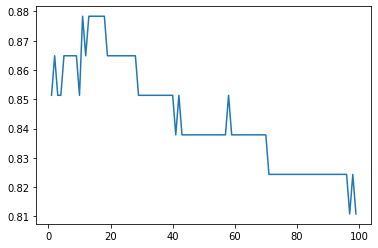

max acc at k=11 acc of 0.8783783783783784


In [ ]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))